# Metrics Visualization for Different Number of Epochs

In [19]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from analysis_util import load_and_extract_metrics

In [20]:
# Set Seaborn style and context
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

In [21]:
paths = {
    1: 'SimulationOutputs/num_epochs_1/metrics.json',
    2: 'SimulationOutputs/num_epochs_2/metrics.json',
    3: 'SimulationOutputs/num_epochs_3/metrics.json',
    4: 'SimulationOutputs/num_epochs_4/metrics.json',
    5: 'SimulationOutputs/num_epochs_5/metrics.json',
    10: 'SimulationOutputs/num_epochs_10/metrics.json'
}

In [22]:
# Load metrics for each number of epochs
num_epochs_metrics = {}
for num_epochs, path in paths.items():
    num_epochs_metrics[num_epochs] = load_and_extract_metrics(path)

In [23]:
# Prepare data for plotting
def prepare_metrics_dataframe(num_epochs_metrics, metric_type):
    """Prepare a long-format DataFrame for Seaborn plotting"""
    data = []
    for num_epochs, metrics in num_epochs_metrics.items():
        for round_num, accuracy in enumerate(metrics[metric_type]):
            data.append({
                'Num Epochs': num_epochs,
                'Round': round_num,
                'Accuracy': accuracy
            })
    return pd.DataFrame(data)

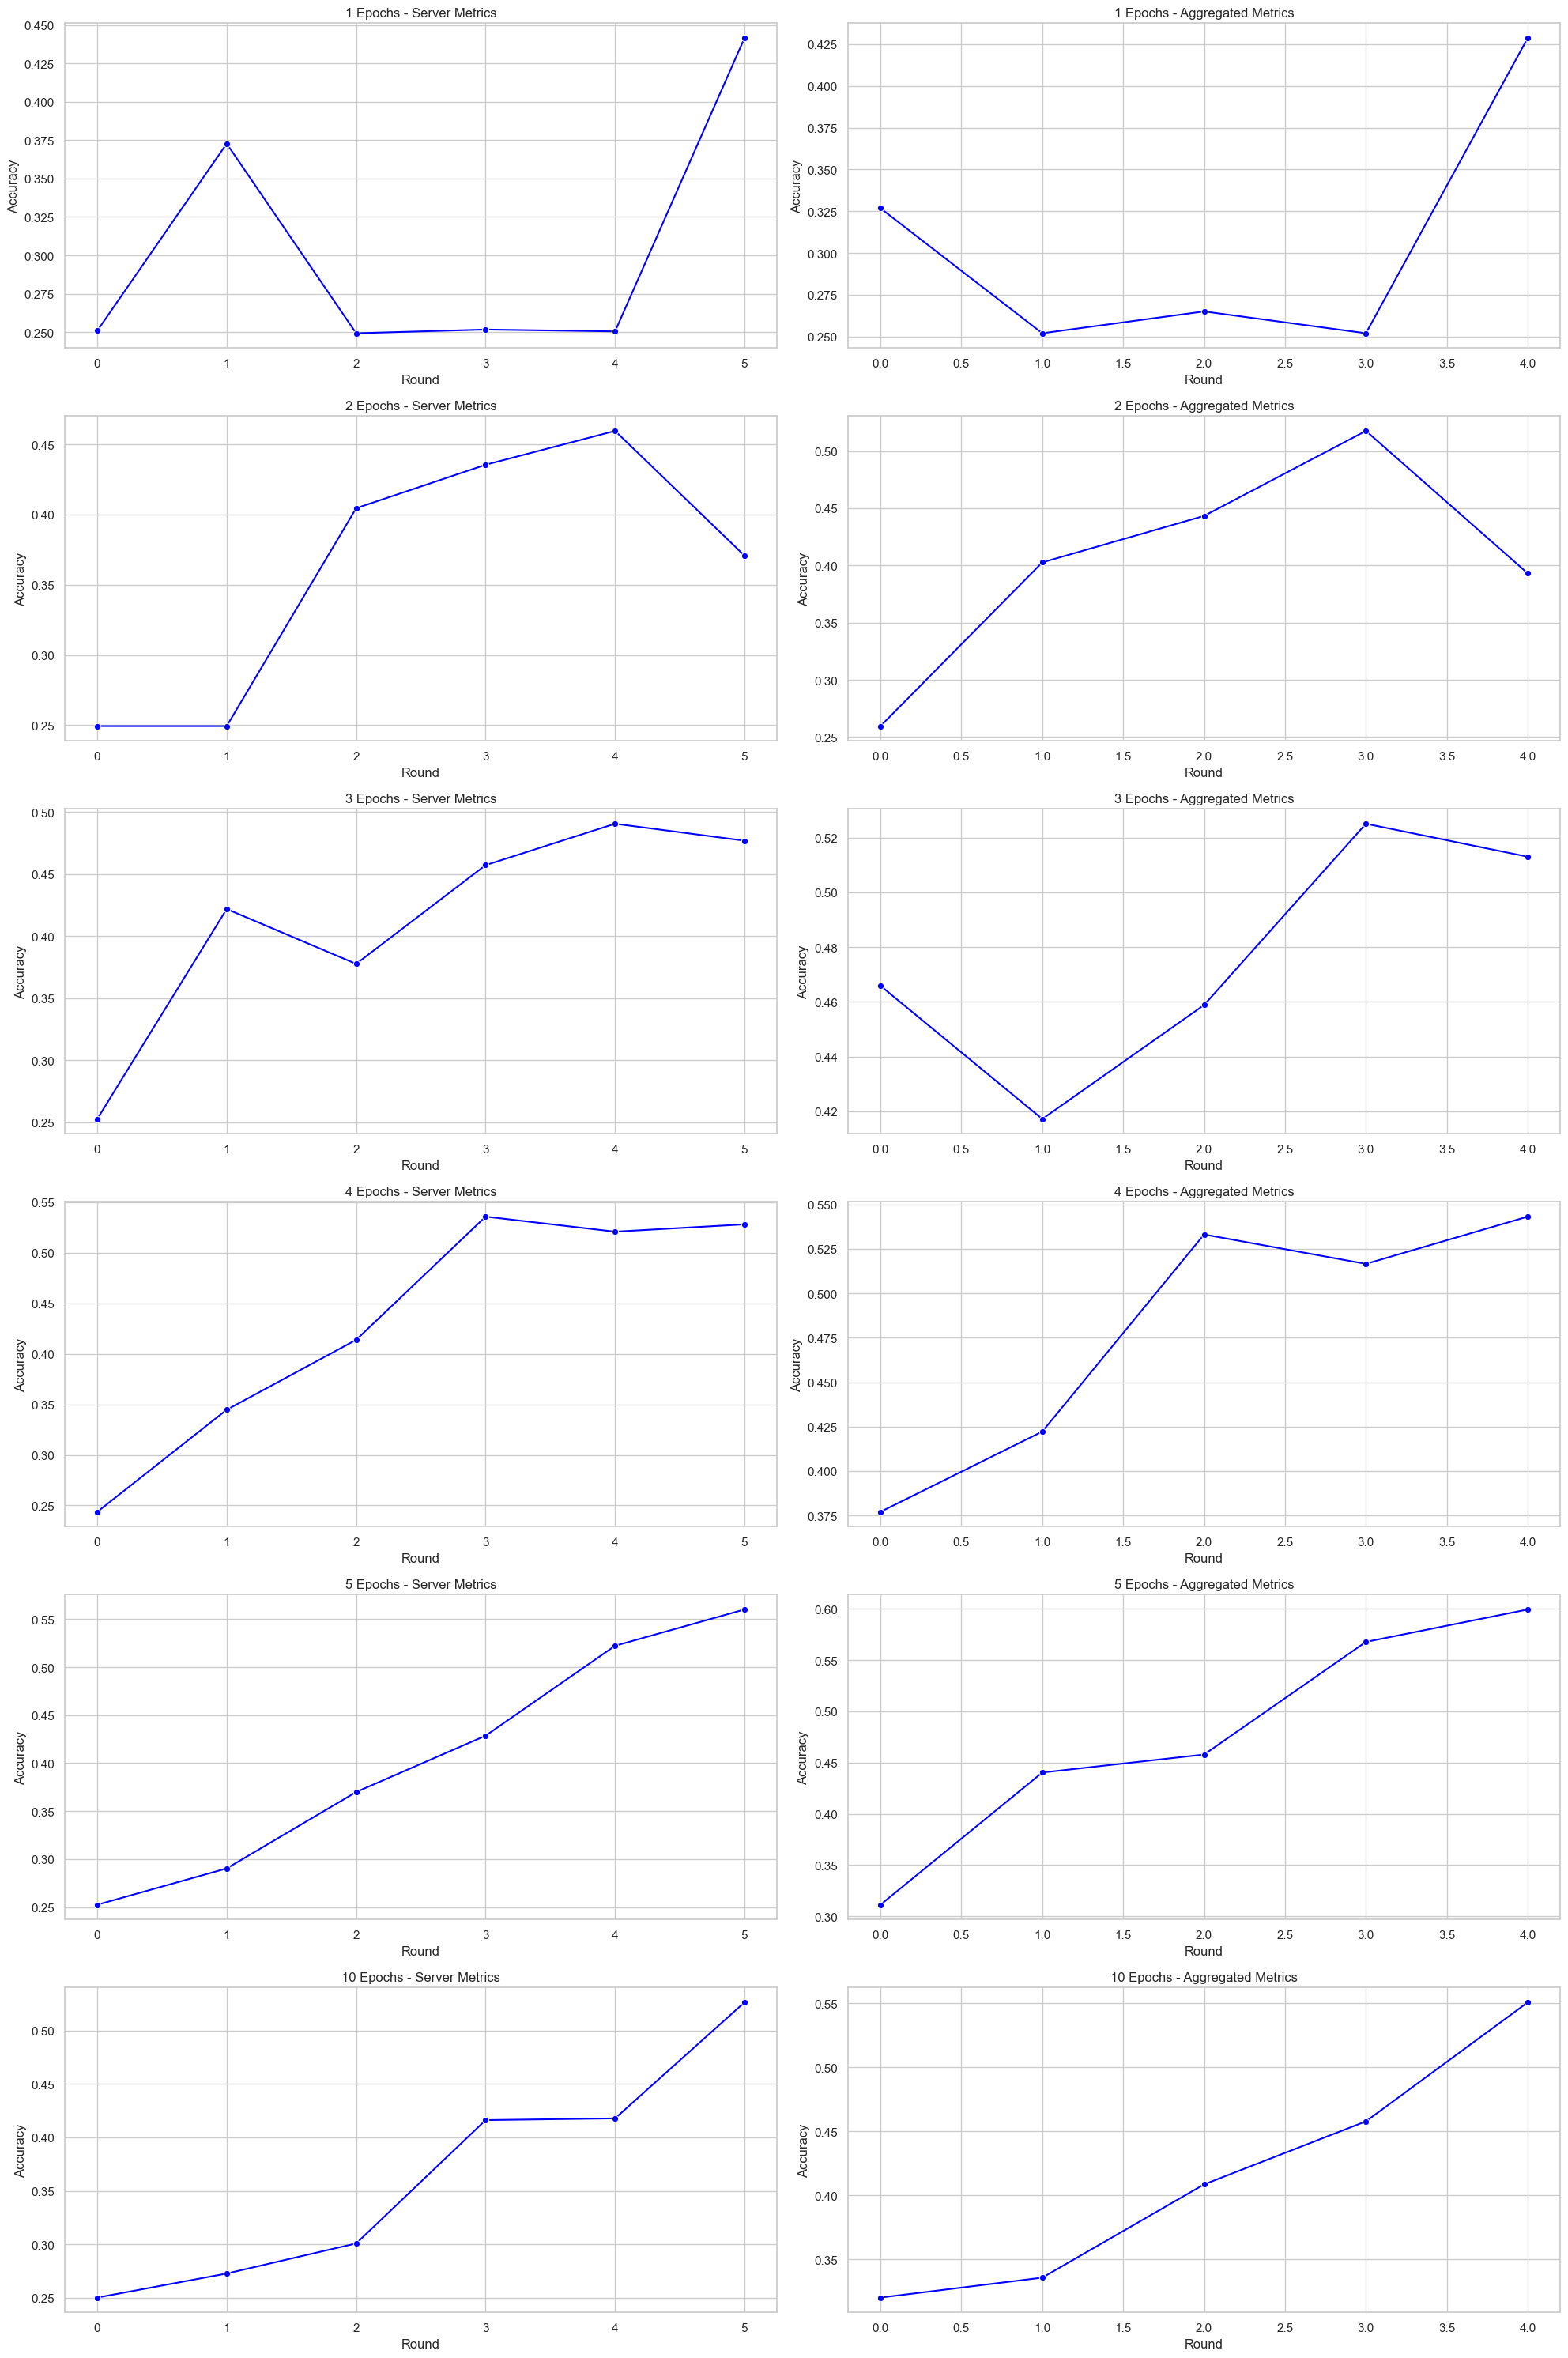

In [24]:
# Visualization 1: 6x2 Subplots Grid with Seaborn
plt.figure(figsize=(20, 30))

metric_types = ['server_metrics', 'aggregated_metrics']
metric_names = ['Server Metrics', 'Aggregated Metrics']

for i, (metric_type, metric_name) in enumerate(zip(metric_types, metric_names)):
    df = prepare_metrics_dataframe(num_epochs_metrics, metric_type)
    
    for j, num_epochs in enumerate(sorted(num_epochs_metrics.keys())):
        plt.subplot(6, 2, 2*j + i + 1)
        subset = df[df['Num Epochs'] == num_epochs]
        sns.lineplot(data=subset, x='Round', y='Accuracy', marker='o', color='blue')
        plt.title(f'{num_epochs} Epochs - {metric_name}')
        plt.xlabel('Round')
        plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

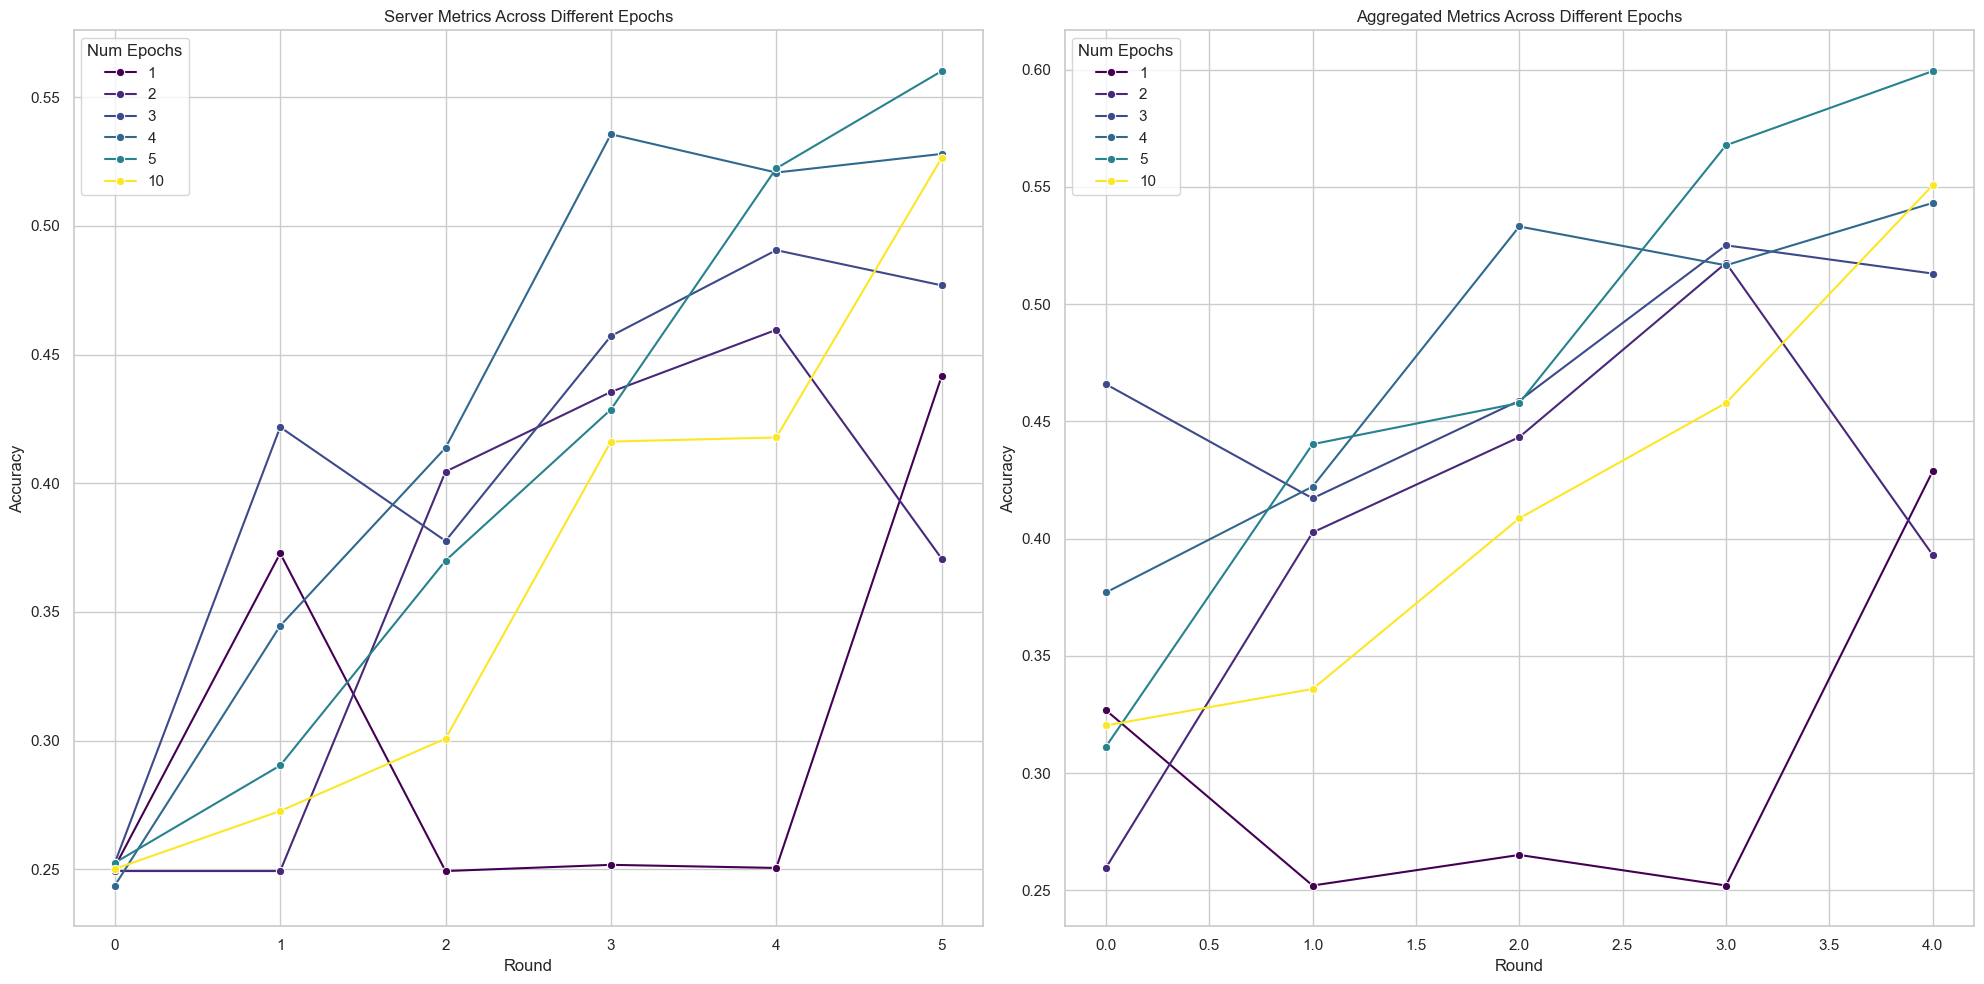

In [25]:
# Visualization 2: Combined Lines Plot with Seaborn
plt.figure(figsize=(20, 10))

metric_types = ['server_metrics', 'aggregated_metrics']
metric_names = ['Server Metrics', 'Aggregated Metrics']

for i, (metric_type, metric_name) in enumerate(zip(metric_types, metric_names)):
    plt.subplot(1, 2, i + 1)
    df = prepare_metrics_dataframe(num_epochs_metrics, metric_type)
    sns.lineplot(data=df, x='Round', y='Accuracy', hue='Num Epochs', marker='o', palette='viridis')
    plt.title(f'{metric_name} Across Different Epochs')
    plt.xlabel('Round')
    plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

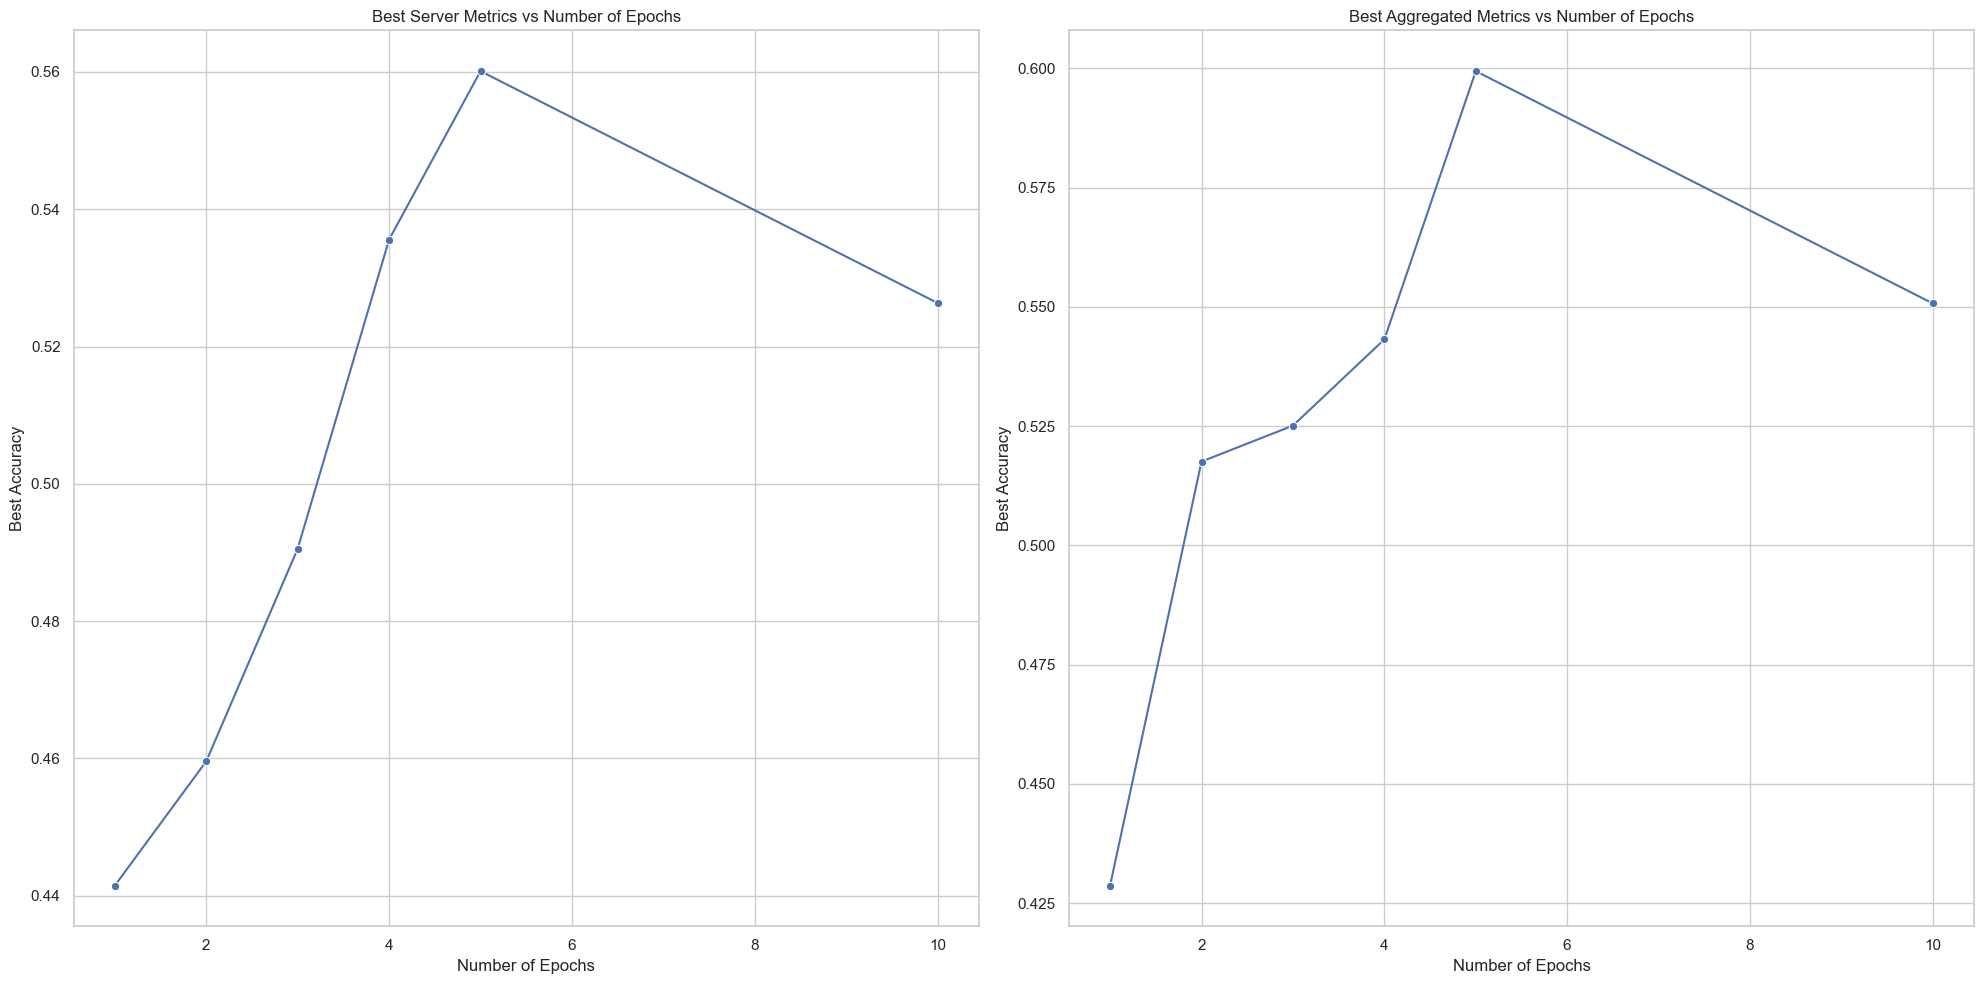

In [26]:
# Visualization 3: Best Metrics as Function of Epochs
best_metrics = {
    'Num Epochs': list(num_epochs_metrics.keys()),
    'Server Best Metrics': [metrics['best_server_metric'] for metrics in num_epochs_metrics.values()],
    'Aggregated Best Metrics': [metrics['best_aggregated_metric'] for metrics in num_epochs_metrics.values()]
}

best_metrics_df = pd.DataFrame(best_metrics)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.lineplot(data=best_metrics_df, x='Num Epochs', y='Server Best Metrics', marker='o')
plt.title('Best Server Metrics vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Best Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=best_metrics_df, x='Num Epochs', y='Aggregated Best Metrics', marker='o')
plt.title('Best Aggregated Metrics vs Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Best Accuracy')

plt.tight_layout()
plt.show()